In [3]:
import numpy as np
np.random.seed(12345)
import matplotlib.pyplot as plt
plt.rc("figure", figsize=(10, 6))
np.set_printoptions(precision=4, suppress=True)

# 第四章 Numpy基础：数组和矢量化计算
`Numpy`是 `Numerical Python` 的缩写，是用`Python`进行数值计算的最重要的功能包。
很多提供科学计算的功能包都将`Numpy`的`array`对象作为通用的数据交换标准接口。
这里讲的绝大多数关于`Numpy`的知识也都可以用于`pandas`。

以下是你能在`Numpy`中找到的东西：
- `ndarry`，高效的多维数组，能够提供快速的面向数组的数学运算和灵活的*广播*能力。
- 不用写循环就能在整个数据数组上执行快速运算的函数。
- 从磁盘读写数组数据和用内存映射文件工作的工具
- 线性代数、随机数生成和傅立叶变换的能力
- 连接Numpy和用C、C++或者Python写的库的C API（应用程序接口）

因为Numpy提供了全面的、有良好文档的C API，所以将数据传送给用低级语言写的外置库和从外置库返回`NumPy`数组类型的数据非常直接。
这个特性让Python成为封装遗留的C、C++或者Fortran代码使它们具有动态、可访问界面的首选语言。

虽然NumPy自己不提供建模或科学计算功能，但理解NumPy数组和面向数组的计算能攻帮你更高效地使用任何采用数组计算语义的工具，比如说Pandas。
因为Numpy是个非常庞大的主题，很多高级的Numpy特性，比如广播等，我们以后再深入讲解。
很多这些高级特性在学习本书后面的内容时并不需要，但是可能对你深入学习Python科学计算有所帮助。

对绝大多数数据分析计算，我集中讲的主要功能领域如下：
- 数据修改和清理、取子集和过滤、变换和其他以数组为基础的快速运算。
- 排序、去重和集合运算等普通数组算法
- 高效、描述性的统计和数据聚集与求和
- 合并和连接异构数据集时的数据对齐和关系数据操作
- 不用带`if-elif-else`的循环将条件逻辑表示成数组表达式
- 成组数据操纵（聚集、变换和函数应用）

虽然`NumPy`为一般数字数据处理提供了计算基础，但很多读者仍然想用`pandas`作为绝大多数统计或分析工作的基础，特别是处理表格式数据的时候。
另外，`pandas`还提供了一些`Numpy`没有的特定领域功能，如时间序列操作等。

`Numpy`对`Python`中的数值计算如此重要的一个原因是它是专门为高效处理大型数组数据而设计的。
之所以如此，有以下几个原因：
- `NumPy`在内部用连续的存储器块存储数据，和其他内置Python对象独立。`NumPy`的算法库是用C语言写的，没有任何类型检查和其他额外开销就可以操作签署存储器。
`NumPy`用的存储器也比其他内置`Python`序列少得多。
- `Numpy`不需要`Python`的`for`循环就可以在整个数组上执行复杂计算，对大序列来说，用`for`循环会很慢。
因为其算法基于C语言，避免了需要翻译的常规Python代码所有的额外开销，所以`NumPy`比一般的`Python`代码快。

为了让你对效率的差别有个概念，考虑有一百万个整数的`NumPy`数组和等效的`Python`列表。

In [1]:
import numpy as np

my_arr = np.arange(1_000_000)
my_list = list(range(1_000_000))

现在我们对两个序列都乘以2

In [2]:
%timeit my_arr2 = my_arr * 2
%timeit my_list2 = [x * 2 for x in my_list]

2.55 ms ± 133 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
86.9 ms ± 245 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


基于`NumPy`的算法比对应的纯`Python`代码一般会快10到100倍，用的存储器也少得多。

## 4.1 `NumPy`的`ndarray`：多位数组对象
`NumPy`的关键特性是其N维数组对象，又称为`ndarray`，是`Python`中大数据集的快速、灵活的容器。
数组让你能对整块数据执行数学运算，所用的语法和在标量元素上执行等效运算类似。

为了让你感受一下`NumPy`如何用和内置`Python`标量表示的表示类似的语法执行批量运算，我先导入`NumPy`，然后创建一个小数组：

In [3]:
import numpy as np
data = np.array([[1.5, -0.1, 3], [0, -3, 6.5]])
data

array([[ 1.5, -0.1,  3. ],
       [ 0. , -3. ,  6.5]])

然后对`data`执行数学运算：

In [4]:
data * 10

array([[ 15.,  -1.,  30.],
       [  0., -30.,  65.]])

In [5]:
data + data

在第一个例子里，所有的元素都被乘以10，第二个例子里，数组每个对应元素的值互加。

`ndarray`是同质数据的通用多维容器，也就是说所有元素的类型必须相同。
每个数组都有个`shape`属性，是表示各维尺寸的一个元组，还有个`type`属性，表示数组的*数据类型*：

In [11]:
print(data.shape)
print(data.dtype)

(2, 3)
float64


熟练地用面向数组的方式编程和思考是成为`Python`科学计算专家的关键一步。

### 创建`ndarray`
使用`arrary`函数是创建数组最容易的方法。
该方法接受任何序列类的对象（包括其他数组），生成一个包含被传入数据的新`NumPy`数组。
例如，列表是可以转换的一个好例子：

In [12]:
data1 = [6, 7.5, 8, 0, 1]
arr1 = np.array(data1)
arr1

嵌套序列，比如说等长度列表的列表，会被转换成多维数组

In [7]:
data2 = [[1, 2, 3, 4], [5, 6, 7, 8]]
arr2 = np.array(data2)
arr2

array([[1, 2, 3, 4],
       [5, 6, 7, 8]])

因为`data2`是列表的列表，所以NumPy数组`arr2`有两维，其形状是从数据猜测出来的。检查其`ndim`和`shape`属性可以验证这一点

In [8]:
print(arr2.ndim)
arr2.shape

2


(2, 4)

除非明确指定，`numpy.array`试图为其创建的数组猜测一个好的数据类型。数据类型被存储在一个特殊的`dtype`宏对象中，例如，前两个例子中我们有：

In [15]:
print(arr1.dtype)
arr2.dtype

float64


dtype('int64')

创建新数组的其他函数。
`np.zeros()`, `np.ones()`, `np.empty()`

In [9]:
print(np.zeros(10))
print(np.zeros((3, 6)))
np.empty((2, 3, 2))

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]


array([[[0.00000000e+000, 1.77863633e-322],
        [0.00000000e+000, 0.00000000e+000],
        [0.00000000e+000, 5.74084271e+169]],

       [[4.51348516e-090, 2.52699616e-052],
        [1.53389612e-052, 4.39260358e+175],
        [3.99910963e+252, 1.46030983e-319]]])

`np.empty()`会包含垃圾数据。

`np.arange`是内置Python `range`函数的数组版本。

In [19]:
np.arange(15)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

*表4-1: 一些重要的NumPy数组创建函数*
|函数|说明|
|---|---|
|array|将输入数据转换成ndarray，数据类型要么靠猜测，要么明确制定；缺省复制数据｜
|asarray|将输入编程ndarray，但如果输入已经是ndarray则不复制数据|
|arange|和内置range类似，但返回ndarray而不是数组|
|ones, ones_like|生成给定形状和数据类型全部都是1的数组；ones_like以另一个数组为参数生成同样形状和数据类型的数组|
|zeros,zeros_like|和ones、ones_like类似，只不过生成0的数组而不是1的数组|
|empty,empty_like|分配新内存生成数组，只不过不填充0或者1这样的值|
|full,full_like|生成给定形状的和数据类型的数组，所有制被设定指定的“填充值”。full_like以另一个数组为参数生成同样形状和数据类型的填充数组|
|eye,identy|生成$N \times N$的单元数组（对角线为1其余为零）|


### `ndarray`的数据类型
*数据类型*或者`dtype`是包括ndarray需要用来将一块存储器翻译成特定类型的信息的特殊对象。

In [10]:
arr1 = np.array([1, 2, 3], dtype=np.float64)
arr2 = np.array([1, 2, 3], dtype=np.int32)
arr1.dtype
arr2.dtype

dtype('int32')

数据类型是NumPy能够和来自其他系统的数据灵活交互的原因之一。
多数情况下，他们提供了直接到底层磁盘或存储器表示的映射，让从磁盘直接读取数据和连接用C或者FORTRAN这样的低级语言写的代码成为可能。
数据类型的命名方式如下：类型名，如`float`或者`int`，后面跟着一个数字表示每个元素的字节数。
标准双精度浮点数（Python的`float`对象就是该类型）要用8字节或者64位，这样，该类型就被称为`float64`。

可以用ndarray的`astype`方法将数组从一个数据类型转化（也叫cast）成另外一种数据类型。

In [11]:
arr = np.array([1, 2, 3, 4, 5])
print(arr.dtype)
float_arr = arr.astype(np.float64)
float_arr
float_arr.dtype

int64


dtype('float64')

在上例子中，整数被cast成浮点数，如果将浮点数cast成整数类型，小数部分会被截去：

In [12]:
arr = np.array([3.7, -1.2, -2.6, 0.5, 12.9, 10.1])
arr
arr.astype(np.int32)

array([ 3, -1, -2,  0, 12, 10], dtype=int32)

如果你有一个表示数字的字符串数组，你可以用`astype`将它们转换成数值形式：

In [13]:
numeric_strings = np.array(["1.25", "-9.6", "42"], dtype=np.string_)
numeric_strings.astype(float)

array([ 1.25, -9.6 , 42.  ])

如果因为某些原因（比如有字符串不能被转换成`float64`），会抛出`ValueError`错误。前面的`float`和`float64`一个意思。

你也可以用其他数组的`dtype`属性。

In [14]:
int_array = np.arange(10)
calibers = np.array([.22, .270, .357, .380, .44, .50], dtype=np.float64)
int_array.astype(calibers.dtype)

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

有一些快捷类型代码可以用来指定`dtype`.

In [15]:
zeros_uint32 = np.zeros(8, dtype="u4")
zeros_uint32

调用`dtype`总是会创建一个新数组，即使❤️数据的类型和老数据一样。

### NumPy数组的数学运算
*矢量化*：不用写for循环就可表达对数据的批量操作。
任何相等数之间的算数运算在一个一个元素上应用：

In [16]:
arr = np.array([[1., 2., 3.], [4., 5., 6.]])
print(arr)
print(arr * arr)
arr - arr

[[1. 2. 3.]
 [4. 5. 6.]]
[[ 1.  4.  9.]
 [16. 25. 36.]]


array([[0., 0., 0.],
       [0., 0., 0.]])

和标量的运算会将标量传播到数组的每个元素：

In [17]:
print(1 / arr)
arr ** 2

[[1.         0.5        0.33333333]
 [0.25       0.2        0.16666667]]


array([[ 1.,  4.,  9.],
       [16., 25., 36.]])

数组之间的比较得到同样大小的布尔数组：

In [18]:
arr2 = np.array([[0., 4., 1.], [7., 2., 12.]])
arr2
arr2 > arr

不同尺寸素组之间的求值操作被称为*广播*，在附录A里详细介绍。
本书不需要对广播有深入了解。

### 基本的索引和切片
一维数组的切片和Python列表里类似

In [19]:
arr = np.arange(10)
arr
arr[5]
arr[5:8]
arr[5:8] = 12
arr

array([ 0,  1,  2,  3,  4, 12, 12, 12,  8,  9])

In [20]:
arr_slice = arr[5:8]
arr_slice

array([12, 12, 12])

改变`arra_slice`的值，原始数组`arr`也会反应改变。

In [21]:
arr_slice[1] = 12345
arr

array([    0,     1,     2,     3,     4,    12, 12345,    12,     8,
           9])

空切片`[:]`会给数组中的所有值赋值

In [22]:
arr_slice[:] = 64
arr

不复制数据是为了效率。想复制数据用`arr[5:8].copy()`.

高阶数组有更多选项。在二位数组中，每个索引不再是标量而是一维数组

In [23]:
arr2d = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
arr2d[2]

这样就可以迭代访问单个元素，但这么做太麻烦，可以传入逗号分靠的索引列表选择单个元素，所以下面两句是等效的。

In [24]:
arr2d[0][2]
arr2d[0, 2]

3

在多维数组中，如果省略后面的索引，返回的数据会是低一维的数组，包括沿着高维的所有数组。

In [25]:
arr3d = np.array([[[1, 2, 3], [4, 5, 6]], [[7, 8, 9], [10, 11, 12]]])
arr3d

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [26]:
arr3d[0]

标量值和数组都可以被赋值给`arr3d[0]`

In [27]:
old_values = arr3d[0].copy()
arr3d[0] = 42
print(arr3d)
arr3d[0] = old_values
arr3d

[[[42 42 42]
  [42 42 42]]

 [[ 7  8  9]
  [10 11 12]]]


array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [28]:
arr3d[1, 0]

array([7, 8, 9])

In [29]:
x = arr3d[1]
print(x)
x[0]

注意所有这些数组的子集都只返回数组的视图。

注意NumPy数组的高维索引语法对常规Python对象，例如列表的列表等不合适。

#### 切片索引


In [30]:
arr
arr[1:6]

array([ 1,  2,  3,  4, 64])

In [32]:
print(arr2d)
arr2d[:2]

[[1 2 3]
 [4 5 6]
 [7 8 9]]


array([[1, 2, 3],
       [4, 5, 6]])

In [33]:
arr2d[:2, 1:]

array([[2, 3],
       [5, 6]])

In [34]:
lower_dim_slice = arr2d[1, :2]

In [35]:
lower_dim_slice.shape

(2,)

In [36]:
arr2d[:2, 2]

array([3, 6])

In [37]:
arr2d[:, :1]

array([[1],
       [4],
       [7]])

In [38]:
arr2d[:2, 1:] = 0
arr2d

array([[1, 0, 0],
       [4, 0, 0],
       [7, 8, 9]])

### Boolean索引
考虑下面的例子，我们在数组里有一些数据，还有一个有重复名字的数组

In [39]:
names = np.array(["Bob", "Joe", "Will", "Bob", "Will", "Joe", "Joe"])
data = np.array([[4, 7], [0, 2], [-5, 6], [0, 0], [1, 2],
                 [-12, -4], [3, 4]])
print(names)
data

假定一个名字对应`data`数组里的一行，我们想选择对应名字 “Bob”的所有列。
和算数运算一样，数组比较也被矢量化了。这样将`names`和`"Bob"`比较会得到一个布尔数组：

In [40]:
names == "Bob"

array([ True, False, False,  True, False, False, False])

索引数组时可以传入布尔数组。

In [41]:
data[names == "Bob"]

array([[4, 7],
       [0, 0]])

该布尔数组的长度必须和要索引的数组一样。
你甚至可以将布尔数组和切片或者整数（或者整数序列，详见后）混合和匹配。

下例中，我选择 `names =="Bob"`的的行并索引列：

In [42]:
data[names == "Bob", 1:]
data[names == "Bob", 1]

[[7]
 [0]]


array([7, 0])

要选择除了`"Bob"`之外的一切可以用 ！= 或者用~对条件取反。

In [44]:
cond = names == "Bob"
data[~cond]

array([[  0,   2],
       [ -5,   6],
       [  1,   2],
       [-12,  -4],
       [  3,   4]])

在对用变量引用的布尔数组取反的时候`~`特别有用。

In [43]:
names != "Bob"
~(names == "Bob")
data[~(names == "Bob")]

array([[  0,   2],
       [ -5,   6],
       [  1,   2],
       [-12,  -4],
       [  3,   4]])

要选择三个名字里面的两个，需要合并多个布尔条件，用布尔算数运算符，比如 &（和）和｜（或）：

In [45]:
mask = (names == "Bob") | (names == "Will")
mask
data[mask]

array([[ 4,  7],
       [-5,  6],
       [ 0,  0],
       [ 1,  2]])

用布尔索引从数组选择数据并赋给新变量，总是会创建数据的新拷贝，即使返回的数组没有变化。
Python关键字`and`和`or`在布尔数组上不能用，要用&和｜。

用布尔数组设定值，会用右边的值取代布尔数组值为真的位置。要将所有小于零的值设置为零，只需要：

In [46]:
data[data < 0] = 0
data

array([[4, 7],
       [0, 2],
       [0, 6],
       [0, 0],
       [1, 2],
       [0, 0],
       [3, 4]])

你还可以用一维布尔数组设置整行或者整列：

In [47]:
data[names != "Joe"] = 7
data

array([[7, 7],
       [0, 2],
       [7, 7],
       [7, 7],
       [7, 7],
       [0, 0],
       [3, 4]])

### Fancy Indexing
*Fancy indexing*是NumPy用来描述用整数数组索引的术语。假定我们有一个$8\times 4$的数组：

In [48]:
arr = np.zeros((8, 4))
for i in range(8):
    arr[i] = i
arr

array([[0., 0., 0., 0.],
       [1., 1., 1., 1.],
       [2., 2., 2., 2.],
       [3., 3., 3., 3.],
       [4., 4., 4., 4.],
       [5., 5., 5., 5.],
       [6., 6., 6., 6.],
       [7., 7., 7., 7.]])

要按特定书序选择行的子集，你可以简单传递指定顺序的整数列表或者ndarray：

In [49]:
arr[[4, 3, 0, 6]]

array([[4., 4., 4., 4.],
       [3., 3., 3., 3.],
       [0., 0., 0., 0.],
       [6., 6., 6., 6.]])

希望结果和你预期的一样。负索引从尾部开始选择行。

In [50]:
arr[[-3, -5, -7]]

array([[5., 5., 5., 5.],
       [3., 3., 3., 3.],
       [1., 1., 1., 1.]])

传递多个索引数组做的事情稍微有点不一样：会选择对应各个索引元组元素的一维数组：

In [51]:
arr = np.arange(32).reshape((8, 4))
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23],
       [24, 25, 26, 27],
       [28, 29, 30, 31]])

In [52]:
arr[[1, 5, 7, 2], [0, 3, 1, 2]]

这里选择了元素(0,1), (5,3), (7,1), (2,2)。
用和轴数一样的整数数组进行fancy indexing的结果总是一维的。

这种情况下fancy indexing的结果和有些用户（包括我自己）预计的可能不一样，他们认为应该是选择数组行和列子集组成的矩形区域。
选择举行区域的一种方法如下：

In [54]:
arr[[1, 5, 7, 2]][:, [0, 3, 1, 2]]

array([[ 4,  7,  5,  6],
       [20, 23, 21, 22],
       [28, 31, 29, 30],
       [ 8, 11,  9, 10]])

记住和切片不一样，在将结果复制给新变量时fancy index总是将数据复制到新数组。
如果你用fancy index赋值，索引的值会改变。

In [55]:
arr[[1, 5, 7, 2], [0, 3, 1, 2]]
arr[[1, 5, 7, 2], [0, 3, 1, 2]] = 0
arr

array([[ 0,  1,  2,  3],
       [ 0,  5,  6,  7],
       [ 8,  9,  0, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22,  0],
       [24, 25, 26, 27],
       [28,  0, 30, 31]])

### 数组转置和坐标轴交换
转置时特殊形式的reshape，返回数组的一个视图但不复制任何内容。
数组有`transpose`方法和特别的`T`属性。

In [56]:
arr = np.arange(15).reshape((3, 5))
arr

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [57]:
arr.T

array([[ 0,  5, 10],
       [ 1,  6, 11],
       [ 2,  7, 12],
       [ 3,  8, 13],
       [ 4,  9, 14]])

做矩阵计算的时候，你可能会经常用转置，比如说用`numpy.dot`计算矩阵内积：

In [58]:
arr = np.array([[0, 1, 0], [1, 2, -2], [6, 3, 2], [-1, 0, -1], [1, 0, 1]])
arr
np.dot(arr.T, arr)

array([[39, 20, 12],
       [20, 14,  2],
       [12,  2, 10]])

@中置运算符是矩阵相乘的另一个方法

In [62]:
arr @ arr.T

array([[ 1,  2,  3,  0,  0],
       [ 2,  9,  8,  1, -1],
       [ 3,  8, 49, -8,  8],
       [ 0,  1, -8,  2, -2],
       [ 0, -1,  8, -2,  2]])

用`.T`转置矩阵是交换坐标轴的一个例子，ndarray有专门de e`swapaxes`方法可以交换坐标轴

In [64]:
arr

array([[ 0,  1,  0],
       [ 1,  2, -2],
       [ 6,  3,  2],
       [-1,  0, -1],
       [ 1,  0,  1]])

In [63]:
arr.swapaxes(0, 1)

array([[ 0,  1,  6, -1,  1],
       [ 1,  2,  3,  0,  0],
       [ 0, -2,  2, -1,  1]])

## 4.2 伪随机数生成
`numpy.random`模块是Python `random`模块的补充：

In [66]:
samples = np.random.standard_normal(size=(4, 4))
samples

array([[-0.19773559,  0.69857669, -0.56366823,  0.5342451 ],
       [-0.39426329, -0.42014855, -0.65130044,  0.73132139],
       [ 1.02293217,  1.33089656,  0.74834749, -0.53484731],
       [-0.13591509, -1.28608442,  0.07300825,  1.17701359]])

Python的内置`random`模块一次只采样一个值。`numpy.random`要快一个数量级以上

In [67]:
from random import normalvariate
N = 1_000_000
%timeit samples = [normalvariate(0, 1) for _ in range(N)]
%timeit np.random.standard_normal(N)

915 ms ± 44 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
37.6 ms ± 148 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


这些随机数不是真正随机的。

In [71]:
rng = np.random.default_rng(seed=12345)
data = rng.standard_normal((2, 3))
data

array([[-1.42382504,  1.26372846, -0.87066174],
       [-0.25917323, -0.07534331, -0.74088465]])

In [69]:
type(rng)

numpy.random._generator.Generator

## 4.3 广义函数：快速每元素执行函数
广义函数又叫`ufunc`是在ndarray数据的每个元素上执行的函数。
你可以将他们看作传入一个或者多个标量值传递然后生成一个或者多个标量结果的简单函数的快速矢量化封装

In [72]:
arr = np.arange(10)
print(arr)
print(np.sqrt(arr))
print(np.exp(arr))

[0 1 2 3 4 5 6 7 8 9]
[0.         1.         1.41421356 1.73205081 2.         2.23606798
 2.44948974 2.64575131 2.82842712 3.        ]
[1.00000000e+00 2.71828183e+00 7.38905610e+00 2.00855369e+01
 5.45981500e+01 1.48413159e+02 4.03428793e+02 1.09663316e+03
 2.98095799e+03 8.10308393e+03]


这两个都是单目ufunc。
象`numpy.add`或者`numpy.maximum`以两个数组为参数（也就是说是双目函数）然后返回一个数组作为结果：

In [75]:
x = rng.standard_normal(8)
y = rng.standard_normal(8)
print(x)
print(y)
print(np.maximum(x, y))

[-1.22867499  0.25755777  0.31290292 -0.13081169  1.26998312 -0.09296246
 -0.06615089 -1.10821447]
[0.13595685 1.34707776 0.06114402 0.0709146  0.43365454 0.27748366
 0.53025239 0.53672097]
[0.13595685 1.34707776 0.31290292 0.0709146  1.26998312 0.27748366
 0.53025239 0.53672097]


虽然不常见，有的unfunc会返回多个数组，`numpy.modf`是Python`modf`的矢量版本，返回浮点数的小树部分和整数部分。

In [76]:
arr = rng.standard_normal(7) * 5
print(arr)
remainder, whole_part = np.modf(arr)
print(remainder)
print(whole_part)

[ 3.09175007 -3.97508728  1.50015473 -8.01350796  1.33399415 -6.30811891
 -0.35635403]
[ 0.09175007 -0.97508728  0.50015473 -0.01350796  0.33399415 -0.30811891
 -0.35635403]
[ 3. -3.  1. -8.  1. -6. -0.]


ufuncs接受一个可选的输出参数，可以将结果赋给现有数组而不是创建一个新数组。

In [77]:
arr
out = np.zeros_like(arr)
np.add(arr, 1)
np.add(arr, 1, out=out)
out

array([ 4.09175007, -2.97508728,  2.50015473, -7.01350796,  2.33399415,
       -5.30811891,  0.64364597])

表4-4和4-5是NumPy的一些ufuncs。
ufuncs在不断增加，所以查找NumPy文档是最好的办法。

## 4.4 用数组进行面向数组编程
有些人称用数组表达式代替显式循环为矢量化。
一般来说，矢量化数组运算比纯Python的等效代码要快很多，特别是对数值计算的影响最大。

附录A会解释广播，将计算矢量化的有力方法。

在网格值上计算函数`sqrt(x^2 + y^2)`，用到`numpy.meshgrid()`函数

In [78]:
points = np.arange(-5, 5, 0.01) # 100 equally spaced points
xs, ys = np.meshgrid(points, points)
ys

array([[-5.  , -5.  , -5.  , ..., -5.  , -5.  , -5.  ],
       [-4.99, -4.99, -4.99, ..., -4.99, -4.99, -4.99],
       [-4.98, -4.98, -4.98, ..., -4.98, -4.98, -4.98],
       ...,
       [ 4.97,  4.97,  4.97, ...,  4.97,  4.97,  4.97],
       [ 4.98,  4.98,  4.98, ...,  4.98,  4.98,  4.98],
       [ 4.99,  4.99,  4.99, ...,  4.99,  4.99,  4.99]])

In [82]:
z = np.sqrt(xs ** 2 + ys ** 2)
z
#z.shape

array([[7.07106781, 7.06400028, 7.05693985, ..., 7.04988652, 7.05693985,
        7.06400028],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       ...,
       [7.04988652, 7.04279774, 7.03571603, ..., 7.0286414 , 7.03571603,
        7.04279774],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568]])

Text(0.5, 1.0, 'Image plot of $\\sqrt{x^2 + y^2}$ for a grid of values')

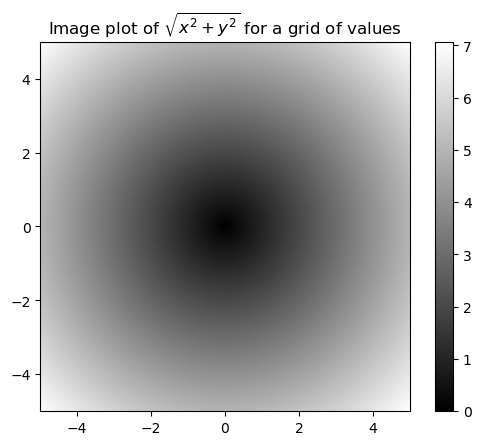

In [83]:
import matplotlib.pyplot as plt
plt.imshow(z, cmap=plt.cm.gray, extent=[-5, 5, -5, 5])
plt.colorbar()
plt.title("Image plot of $\sqrt{x^2 + y^2}$ for a grid of values")

In [84]:
plt.draw()

<Figure size 640x480 with 0 Axes>

In [85]:
plt.close("all")

#### 将条件逻辑表示成数组运算
`numpy.where`函数是三目表达式`x if condition else y`的矢量化版本。
假定我们有一个布尔数组和两个值数组“

In [86]:
xarr = np.array([1.1, 1.2, 1.3, 1.4, 1.5])
yarr = np.array([2.1, 2.2, 2.3, 2.4, 2.5])
cond = np.array([True, False, True, True, False])

假定只要`cond`里的值是`True`，我们就取`xarr`中对应的值，斗则就取`yarr`的对应值。完成这个工作的list comprehension如下所示

In [87]:
result = [(x if c else y)
          for x, y, c in zip(xarr, yarr, cond)]
result

[1.1, 2.2, 1.3, 1.4, 2.5]

着有多个问题。首先如果数组比较大，速度不够快，其次，在多维数组上用不了。
用`numpy.where`你可以用一个函数调用完任务。

In [88]:
result = np.where(cond, xarr, yarr)
result

array([1.1, 2.2, 1.3, 1.4, 2.5])

`numpy.where`的第二个和第三个参数不一定非要是数组，也可以是标量。
假定你有一个随机数处的矩阵，你想用2代替所有正值用-2代替所有复制。

In [89]:
arr = rng.standard_normal((4, 4))
print(arr)
print(arr > 0)
np.where(arr > 0, 2, -2)

[[ 0.47404973 -0.41485376  0.0977165  -1.64041784]
 [-0.85725882  0.68828179 -1.15452958  0.65045239]
 [-1.38835995 -0.90738246 -1.09542531  0.00714569]
 [ 0.5343599  -1.06580785 -0.18147274  1.6219518 ]]
[[ True False  True False]
 [False  True False  True]
 [False False False  True]
 [ True False False  True]]


array([[ 2, -2,  2, -2],
       [-2,  2, -2,  2],
       [-2, -2, -2,  2],
       [ 2, -2, -2,  2]])

用`numpy.where`的时候可以混合使用标量和数组。如果，只将`arr`正值替换成常数2，可以这样做：

In [90]:
np.where(arr > 0, 2, arr) # set only positive values to 2

array([[ 2.        , -0.41485376,  2.        , -1.64041784],
       [-0.85725882,  2.        , -1.15452958,  2.        ],
       [-1.38835995, -0.90738246, -1.09542531,  2.        ],
       [ 2.        , -1.06580785, -0.18147274,  2.        ]])

### 数学和统计函数：


In [93]:
arr = rng.standard_normal((5, 4))
arr
arr.mean()
np.mean(arr)
arr.sum()

6.66 µs ± 113 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
8.69 µs ± 277 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


2.7106061305981015

In [95]:
print(arr.mean(axis=1))
arr.sum(axis=0)

[-0.39966019 -0.34061123 -0.24767618  0.80543558  0.86016356]


array([-4.21246553,  0.99571483,  4.89023585,  1.03712098])

In [96]:
arr = np.array([0, 1, 2, 3, 4, 5, 6, 7])
arr.cumsum()

array([ 0,  1,  3,  6, 10, 15, 21, 28])

In [81]:
arr = np.array([[0, 1, 2], [3, 4, 5], [6, 7, 8]])
arr

In [82]:
arr.cumsum(axis=0)
arr.cumsum(axis=1)

In [83]:
arr = rng.standard_normal(100)
(arr > 0).sum() # Number of positive values
(arr <= 0).sum() # Number of non-positive values

In [84]:
bools = np.array([False, False, True, False])
bools.any()
bools.all()

In [85]:
arr = rng.standard_normal(6)
arr
arr.sort()
arr

In [86]:
arr = rng.standard_normal((5, 3))
arr

In [87]:
arr.sort(axis=0)
arr
arr.sort(axis=1)
arr

In [88]:
arr2 = np.array([5, -10, 7, 1, 0, -3])
sorted_arr2 = np.sort(arr2)
sorted_arr2

In [89]:
names = np.array(["Bob", "Will", "Joe", "Bob", "Will", "Joe", "Joe"])
np.unique(names)
ints = np.array([3, 3, 3, 2, 2, 1, 1, 4, 4])
np.unique(ints)

In [90]:
sorted(set(names))

In [91]:
values = np.array([6, 0, 0, 3, 2, 5, 6])
np.in1d(values, [2, 3, 6])

In [92]:
arr = np.arange(10)
np.save("some_array", arr)

In [93]:
np.load("some_array.npy")

In [94]:
np.savez("array_archive.npz", a=arr, b=arr)

In [95]:
arch = np.load("array_archive.npz")
arch["b"]

In [96]:
np.savez_compressed("arrays_compressed.npz", a=arr, b=arr)

In [97]:
!rm some_array.npy
!rm array_archive.npz
!rm arrays_compressed.npz

In [98]:
x = np.array([[1., 2., 3.], [4., 5., 6.]])
y = np.array([[6., 23.], [-1, 7], [8, 9]])
x
y
x.dot(y)

In [99]:
np.dot(x, y)

In [100]:
x @ np.ones(3)

In [101]:
from numpy.linalg import inv, qr
X = rng.standard_normal((5, 5))
mat = X.T @ X
inv(mat)
mat @ inv(mat)

In [102]:
import random
position = 0
walk = [position]
nsteps = 1000
for _ in range(nsteps):
    step = 1 if random.randint(0, 1) else -1
    position += step
    walk.append(position)


In [103]:
plt.figure()

In [104]:
plt.plot(walk[:100])

In [105]:
nsteps = 1000
rng = np.random.default_rng(seed=12345)  # fresh random generator
draws = rng.integers(0, 2, size=nsteps)
steps = np.where(draws == 0, 1, -1)
walk = steps.cumsum()

In [106]:
walk.min()
walk.max()

In [107]:
(np.abs(walk) >= 10).argmax()

In [108]:
nwalks = 5000
nsteps = 1000
draws = rng.integers(0, 2, size=(nwalks, nsteps)) # 0 or 1
steps = np.where(draws > 0, 1, -1)
walks = steps.cumsum(axis=1)
walks

In [109]:
walks.max()
walks.min()

In [110]:
hits30 = (np.abs(walks) >= 30).any(axis=1)
hits30
hits30.sum() # Number that hit 30 or -30

In [111]:
crossing_times = (np.abs(walks[hits30]) >= 30).argmax(axis=1)
crossing_times

In [112]:
crossing_times.mean()

In [113]:
draws = 0.25 * rng.standard_normal((nwalks, nsteps))